<a href="https://colab.research.google.com/github/NyasaShaiju/Task-Support_Vector_Machines_-SVM-/blob/main/Task7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task 7: Support Vector Machines (SVM)

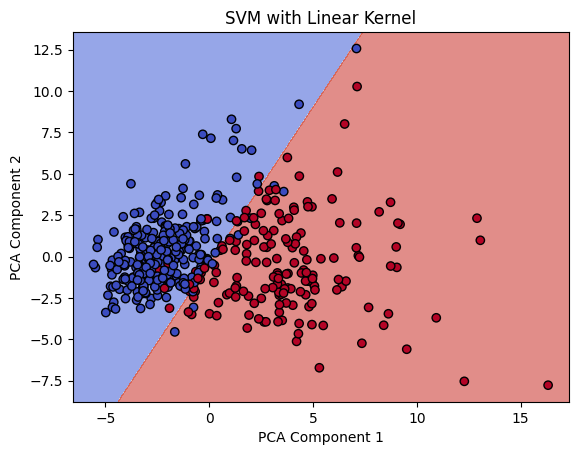

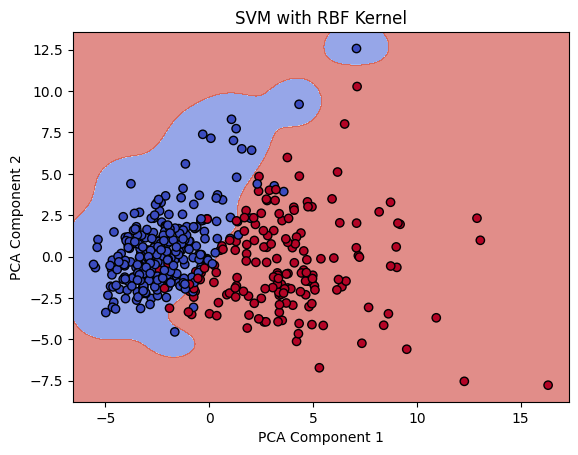

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters from GridSearchCV: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
Cross-Validation Accuracy: 0.9385343890700202
Confusion Matrix:
 [[71  0]
 [ 3 40]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        71
           1       1.00      0.93      0.96        43

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix


df = pd.read_csv('/content/breast-cancer.csv')

df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
df = df.loc[:, ~df.columns.str.contains('^Unnamed|id')]


X = df.drop('diagnosis', axis=1)
y = df['diagnosis']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_train, y_train)


svm_rbf = SVC(kernel='rbf', C=1, gamma=0.5)
svm_rbf.fit(X_train, y_train)


def plot_decision_boundary(model, X, y, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.6, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.title(title)
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.show()


plot_decision_boundary(svm_linear, X_train, y_train, "SVM with Linear Kernel")
plot_decision_boundary(svm_rbf, X_train, y_train, "SVM with RBF Kernel")


param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters from GridSearchCV:", grid.best_params_)


best_model = grid.best_estimator_
scores = cross_val_score(best_model, X_pca, y, cv=5)
print("Cross-Validation Accuracy:", scores.mean())


y_pred = best_model.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
